In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [3]:
data=pd.read_excel(r"C:\Users\HP\Dropbox\MSCBA_THIRD_SEM\MINOR_PROJECT\youtube_comments (3).xlsx")
data.head(10)

,Username,Likes,Comment Date,Comment
0,xxxyyyzzzaaa,0,2023-10-23T18:41:47Z,Thank you for free advice.
1,Glória,0,2023-10-05T17:28:12Z,A friend of mine is at the hospital almost dea...
2,Robert Harvey,2,2023-09-28T13:10:11Z,"nicotine is not that harmful, its the smoke th..."
3,namapro,1,2023-09-24T09:45:32Z,"Pure vape contains no more than 2 substances, ..."
4,Danish Soomro,0,2023-09-22T02:36:36Z,Seems like I know more than Doctor
5,Matheus Cafalchio,2,2023-09-19T19:43:07Z,"Vape can be less harmful, but people vape 10 t..."
6,Janus Mendiola,0,2023-09-18T21:05:05Z,I was waiting for Dr. Virad to say more but al...
7,Waheed Khan,0,2023-09-14T03:28:13Z,My chest feels almost as if I ain't smoking wh...
8,hitaniswatchingyou,1,2023-09-06T02:03:10Z,the real problem with vaping is what the good ...
9,B R,0,2023-08-06T12:46:26Z,"Very poor video, we all know that vaping isn’t..."


In [4]:
comments=data["Comment"]

In [5]:
df=pd.DataFrame(comments)
df

,Comment
0,Thank you for free advice.
1,A friend of mine is at the hospital almost dea...
2,"nicotine is not that harmful, its the smoke th..."
3,"Pure vape contains no more than 2 substances, ..."
4,Seems like I know more than Doctor
...,...
71,Really good and informative video.
72,Your research is stupid .Vaping is 95% less ha...
73,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...
74,"But nicotine isn't at all that harmfull, it is..."


In [6]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [8]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [9]:
sentiments=SentimentIntensityAnalyzer()

Positive=[sentiments.polarity_scores(i)["pos"] for i in df["Comment"]]
Negative=[sentiments.polarity_scores(i)["neg"] for i in df["Comment"]]
Neutral=[sentiments.polarity_scores(i)["neu"] for i in df["Comment"]]
Compound=[sentiments.polarity_scores(i)["compound"] for i in df["Comment"]]

df['Positive']=Positive
df['Negative']=Negative
df['Neutral']=Neutral
df['Compound']=Compound

score=df["Compound"].values
sentiment=[]

for i in score:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=-0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
df["Sentiment"]=sentiment

In [10]:
df.head(15)

,Comment,Positive,Negative,Neutral,Compound,Sentiment
0,Thank you for free advice.,0.659,0.000,0.341,0.7003,Positive
1,A friend of mine is at the hospital almost dea...,0.186,0.233,0.581,-0.2040,Negative
2,"nicotine is not that harmful, its the smoke th...",0.053,0.184,0.764,-0.8626,Negative
3,"Pure vape contains no more than 2 substances, ...",0.000,0.172,0.828,-0.9209,Negative
4,Seems like I know more than Doctor,0.333,0.000,0.667,0.3612,Positive
5,"Vape can be less harmful, but people vape 10 t...",0.000,0.000,1.000,0.0000,Neutral
6,I was waiting for Dr. Virad to say more but al...,0.131,0.194,0.675,-0.8338,Negative
7,My chest feels almost as if I ain't smoking wh...,0.136,0.000,0.864,0.4549,Positive
8,the real problem with vaping is what the good ...,0.075,0.042,0.883,0.7354,Positive
9,"Very poor video, we all know that vaping isn’t...",0.090,0.070,0.840,0.0525,Positive


In [11]:
df1=pd.DataFrame(df[["Comment","Sentiment"]])

In [12]:
df1

,Comment,Sentiment
0,Thank you for free advice.,Positive
1,A friend of mine is at the hospital almost dea...,Negative
2,"nicotine is not that harmful, its the smoke th...",Negative
3,"Pure vape contains no more than 2 substances, ...",Negative
4,Seems like I know more than Doctor,Positive
...,...,...
71,Really good and informative video.,Positive
72,Your research is stupid .Vaping is 95% less ha...,Negative
73,https://youtu.be/7PT1TRo3b4M \n\nSuggest that ...,Positive
74,"But nicotine isn't at all that harmfull, it is...",Negative


In [13]:
df["Sentiment"].value_counts()



Positive    34
Negative    22
Neutral     20
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Count')

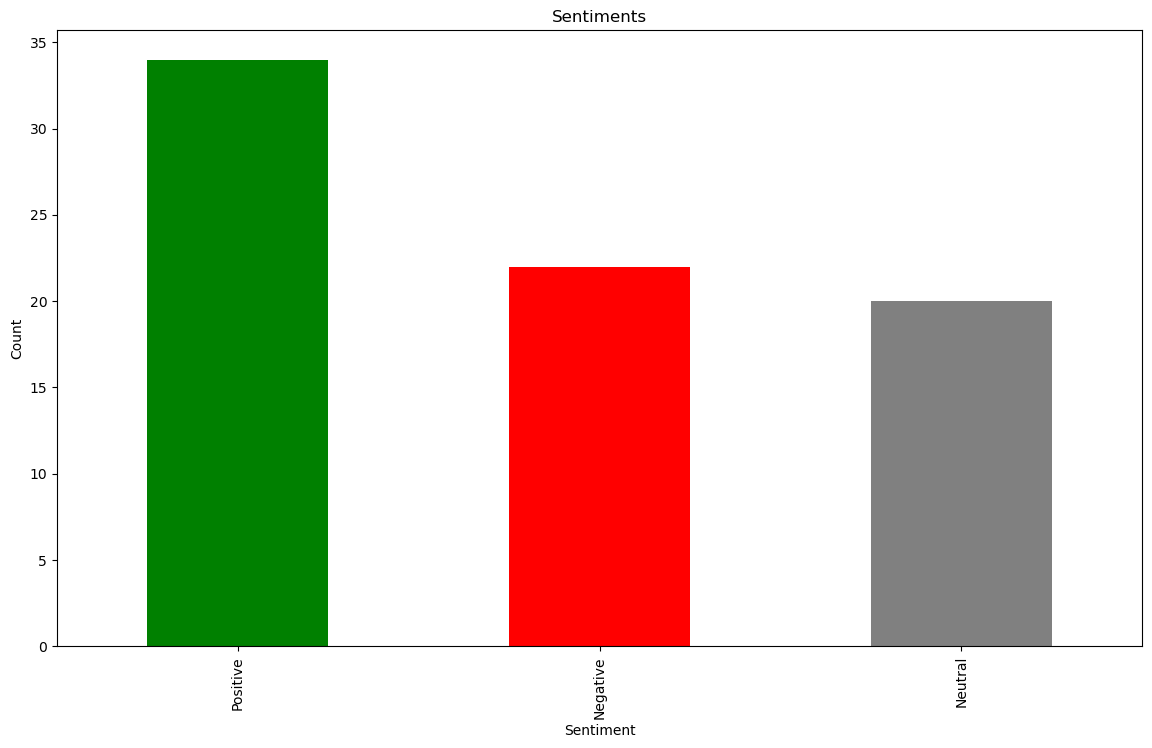

In [14]:
c = ['green', 'red', 'grey']
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(14,8), title="Sentiments",color=c)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")